# Trabalho Prático - Cálculo Numérico (SME0104)

Este notebook contém a resolução completa do trabalho prático da disciplina de Cálculo Numérico (SME0104), ministrada pela professora Cynthia Lage Ferreira, conforme as orientações fornecidas.

Todas as questões foram resolvidas em Python, com ênfase na implementação dos métodos numéricos abordados em aula, análise teórica e validação dos resultados obtidos.

**Autores**:  
Luiz Felipe Diniz Costa - 13782032  
Pedro Lucas Figueiredo Bahiense - 14675458

> **Observação**  
> O Trabalho incluirá um resumo teórico para cada questão, conforme sugerido pela professora.

## Importações

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt


## Questão 1: Sistemas Lineares

Discuta, detalhadamente, as diferenças entre as funções `func1` e `func2` apresentadas abaixo. Comente os códigos, os resultados obtidos e apresente as suas conclusões a partir da aplicação destas duas funções no exemplo abaixo.

### Revisão de sistemas lineares, Gaus e Fatoração LU

Um sistema linear com $m$ equações e $n$ variáveis é escrito como:

$$
\begin{aligned}
a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n &= b_1\\
a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n &= b_2\\
&\vdots\\
a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n &= b_m
\end{aligned}
$$

* $a_{ij}$ são os coeficientes
* $x_j$ são as incógnitas
* $b_i$ são os termos independentes

De forma matricial, definimos

$$
A = [a_{ij}]_{m\times n},\quad
x = \begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix},\quad
b = \begin{bmatrix}b_1\\\vdots\\b_m\end{bmatrix},
$$

e escrevemos

$$
A\,x = b.
$$

Para simplificar a aplicação de métodos de eliminação, utilizamos a **matriz aumentada**:

$$
[A \mid b] =
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} & \mid & b_1\\
a_{21} & a_{22} & \dots & a_{2n} & \mid & b_2\\
\vdots & \vdots & \ddots & \vdots & \mid & \vdots\\ 
a_{m1} & a_{m2} & \dots & a_{mn} & \mid & b_m
\end{bmatrix}.
$$

### Possíveis soluções de um sistema linear

1. **Solução única**
   O sistema admite exatamente uma solução.

2. **Infinitas soluções**
   Existem várias combinações $(x_1,\dots,x_n)$ que satisfazem todas as equações.

3. **Sem solução**
   Não há nenhum vetor $x$ que torne todas as equações verdadeiras.

**Critério pelo determinante**

* Se $\det(A)\neq 0$, então o sistema tem solução única.
* Se $\det(A)=0$, pode ter infinitas soluções ou nenhuma solução.


#### 1. Retas concorrentes (solução única)

Duas retas no plano $\mathbb{R}^2$ que se interceptam em um único ponto correspondem a um sistema de duas equações lineares com solução única. O ponto de interseção $(x_1, x_2)$ é exatamente a solução do sistema.


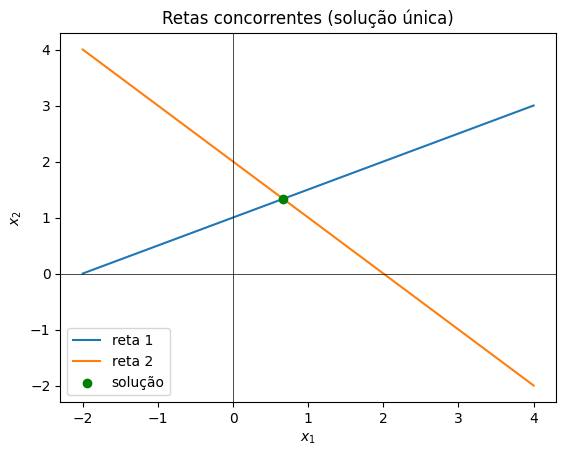

In [11]:
# coeficientes das retas
m1, b1 = 0.5, 1    # reta 1: x2 = 0.5*x1 + 1
m2, b2 = -1, 2     # reta 2: x2 = -1*x1 + 2

# domínio para plotar as retas
x = np.linspace(-2, 4, 400)
y1 = m1 * x + b1
y2 = m2 * x + b2

# calcular ponto de interseção
# m1*x + b1 = m2*x + b2  ->  x = (b2 - b1) / (m1 - m2)
xi = (b2 - b1) / (m1 - m2)
yi = m1 * xi + b1

plt.figure()
plt.plot(x, y1, label='reta 1')
plt.plot(x, y2, label='reta 2')
plt.scatter([xi], [yi], color='green', label='solução', zorder=5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Retas concorrentes (solução única)')
plt.show()

#### 2. Retas coincidentes (infinitas soluções)

Quando duas equações representam exatamente a mesma reta, todo ponto que pertence a essa reta satisfaz o sistema. Isso gera infinitas soluções, pois há um grau de liberdade (qualquer $(x_1,x_2)$ na reta funciona).

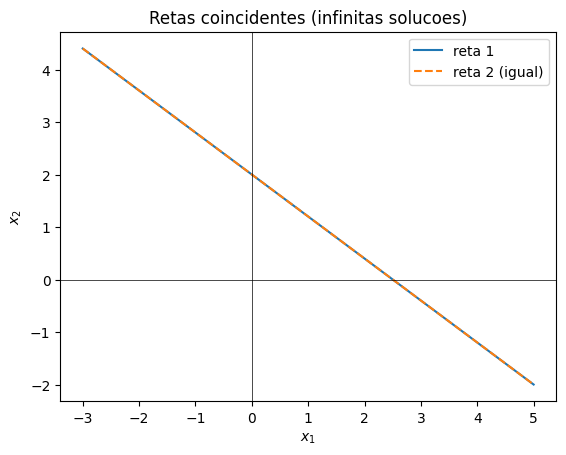

In [12]:
# definindo coeficientes iguais para coincidir
m, b = -0.8, 2    # x2 = -0.8*x1 + 2

x = np.linspace(-3, 5, 400)
y = m * x + b

plt.figure()
plt.plot(x, y, label='reta 1')
plt.plot(x, y, linestyle='--', label='reta 2 (igual)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Retas coincidentes (infinitas solucoes)')
plt.show()

#### 3. Retas paralelas (sem solução)

Duas retas no plano que possuem o mesmo coeficiente angular mas interceptações diferentes nunca se encontram, logo o sistema associado não possui solução.

Sejam as linhas:

$$
x_2 = m\,x_1 + b_1
\quad\text{e}\quad
x_2 = m\,x_1 + b_2
$$

com $m$ idêntico, mas $b_1 \neq b_2$. Como não há nenhum $(x_1,x_2)$ que satisfaça simultaneamente ambas as equações, o sistema é impossível.


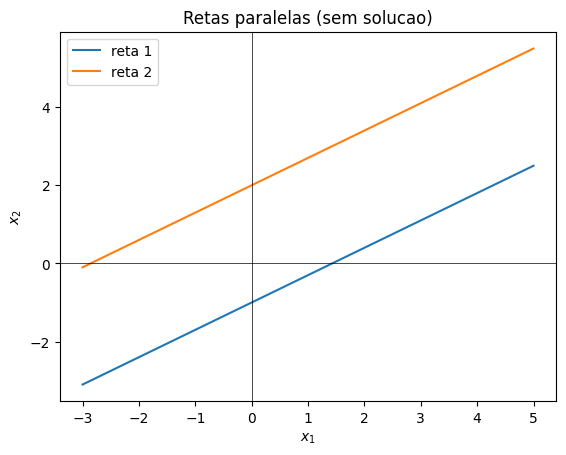

In [13]:
# mesmo coeficiente angular, interceptações diferentes
m = 0.7
b1, b2 = -1, 2   # b1 != b2

x = np.linspace(-3, 5, 400)
y1 = m * x + b1
y2 = m * x + b2

plt.figure()
plt.plot(x, y1, label='reta 1')
plt.plot(x, y2, label='reta 2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Retas paralelas (sem solucao)')
plt.show()

### Determinantes de matrizes triangulares

Uma **matriz triangular** é aquela que tem todos os elementos acima ou abaixo da diagonal principal iguais a zero:

* **Triangular superior**: zeros abaixo da diagonal

  $$
  \begin{bmatrix}
  1 & 4 & 5\\
  0 & 2 & 6\\
  0 & 0 & 3
  \end{bmatrix}
  $$

* **Triangular inferior**: zeros acima da diagonal

  $$
  \begin{bmatrix}
  1 & 0 & 0\\
  4 & 2 & 0\\
  5 & 6 & 3
  \end{bmatrix}
  $$

#### Propriedade do determinante

Para qualquer matriz triangular $T\in\mathbb{R}^{n\times n}$, vale que

$$
\det(T) = \prod_{i=1}^{n} T_{ii},
$$

ou seja, basta multiplicar os elementos da diagonal principal.

### Métodos de solução de sistemas

**Métodos diretos**

* Geram a solução exata de um sistema quadrado $n\times n$ em um número finito de operações.
* Exemplo clássico: eliminação de Gauss.

**Métodos iterativos**

* Partem de um chute inicial $\,x^{(0)}$ e produzem uma sequência $\{x^{(k)}\}$.
* Sob certas condições, essa sequência converge para a solução real do sistema.
* São úteis quando a matriz é muito grande ou esparsa e métodos diretos ficam caros.


Agora vamos detalhar o método direto da Eliminação de Gauss, que será a ferramenta que utilizaremos nesse exercício.

### Eliminação de Gauss

A eliminação de Gauss é um **método direto** que transforma o sistema matricial original em outro sistema equivalente, porém de solução simples (triangular). As soluções finais permanecem as mesmas.

#### Operações elementares sobre linhas

1. **Troca de linhas**
   $L_i \leftrightarrow L_j$
   Permuta a posição das equações $i$ e $j$.

2. **Escalonamento de linha**
   $L_i \leftarrow k\cdot L_i,\quad k \neq 0$
   Multiplica todos os elementos da linha $i$ por um escalar não nulo.

3. **Substituição linear**
   $L_i \leftarrow L_i + k\cdot L_j,\quad i\neq j$
   Soma à linha $i$ um múltiplo da linha $j$.

4. **Descartar linha nula**
   Se uma linha ficar com todos os elementos iguais a zero, ela não contribui para o sistema e pode ser removida.

Aplicando repetidamente essas operações na **matriz aumentada** $[A\mid b]$, chegamos a uma forma triangular superior, de onde obtemos facilmente cada incógnita por substituição regressiva.


#### Passo a passo

Definimos **pivô** como o primeiro elemento não nulo de cada linha da matriz aumentada $[A\mid b]$.

**Fase 1 - eliminação**

1. Monte a matriz aumentada do sistema.
2. Para a 1ª linha:

   * Identifique o pivô (primeiro elemento não zero).
   * Use operações elementares para zerar todos os elementos abaixo desse pivô.
3. Para a 2ª linha:
   * Localize o pivô (na 2ª coluna agora).
   * Zere todos os elementos abaixo.
4. Repita para cada linha subsequente até obter forma triangular superior.

**Fase 2 - retro­substituição**

1. A partir da última linha (única incógnita não nula), calcule esse valor de $x_n$.
2. Substitua $x_n$ na penúltima linha para obter $x_{n-1}$.
3. Prossiga de baixo para cima até encontrar todas as variáveis $\{x_1,\dots,x_n\}$.


### Fatoração LU

A fatoração LU é um método direto que reescreve a matriz $A$ como produto de duas matrizes triangulares:

- $L$: matriz triangular inferior, com 1 na diagonal principal  
- $U$: matriz triangular superior  

Ou seja, buscamos  
$$
A = L\,U.
$$

Para construir $L$ e $U$, aplicamos as mesmas operações da eliminação de Gauss. Considere um sistema genérico $3\times3$:

$$
\begin{aligned}
a_{11}x_1 + a_{12}x_2 + a_{13}x_3 &= b_1,\\
a_{21}x_1 + a_{22}x_2 + a_{23}x_3 &= b_2,\\
a_{31}x_1 + a_{32}x_2 + a_{33}x_3 &= b_3,
\end{aligned}
\quad
A = 
\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{bmatrix}.
$$

1. Na etapa de eliminação de Gauss, calculamos multiplicadores para zerar os elementos abaixo da diagonal:
   $$
   m_{21} = \frac{a_{21}}{a_{11}},\quad
   m_{31} = \frac{a_{31}}{a_{11}}.
   $$
2. Esses valores tornam-se $L_{21}$ e $L_{31}$, respectivamente.
3. Após aplicar as operações, obtemos a matriz triangular superior
   $$
   U = 
   \begin{bmatrix}
   u_{11} & u_{12} & u_{13}\\
   0      & u_{22} & u_{23}\\
   0      & 0      & u_{33}
   \end{bmatrix}.
   $$
4. Repetindo o processo na segunda coluna (para zerar abaixo de $u_{22}$), calculamos
   $$
   m_{32} = \frac{u_{32}}{u_{22}},
   $$
   que se torna $L_{32}$.

Ao final, temos

$$
L = 
\begin{bmatrix}
1      & 0      & 0\\
m_{21} & 1      & 0\\
m_{31} & m_{32} & 1
\end{bmatrix},
\quad
U = 
\begin{bmatrix}
u_{11} & u_{12} & u_{13}\\
0      & u_{22} & u_{23}\\
0      & 0      & u_{33}
\end{bmatrix},
$$

de modo que
$$
A = L\,U.
$$


Na questão 1 usamos a fatoração LU para resolver o mesmo sistema $A x = b$ com diferentes vetores $b$, aproveitando que uma única decomposição $A = L\,U$ nos permite resolver cada caso via dois sistemas triangulares (primeiro $L\,y = b$, depois $U\,x = y$).

#### Entendendo o problema da Questão 1

Para começar a Questão 1, precisamos entender que o objetivo é comparar duas formas de fazer a decomposição LU de uma mesma matriz em Python. A função `func1` implementa a versão clássica da eliminação de Gauss, trabalhando sobre toda a matriz, enquanto `func2` restringe o cálculo a uma faixa de largura `p` ao redor da diagonal, o que reduz o número de operações para matrizes com banda estreita. 

No exemplo proposto, geramos uma matriz quadrada $A$ de tamanho $n \times n$, em que só há valores diferentes de zero dentro dessa banda de largura $p$. Em seguida, medimos quanto tempo cada função leva para produzir $L$ e $U$ e calculamos o erro de reconstrução $\lVert LU - A \rVert$ para verificar se ambas chegam ao mesmo resultado com precisão. 

Com isso em mente, podemos ir para a próxima parte.

### Padrão de fill-in e estrutura de banda

Em matrizes banda-estreita de largura $p$, a fatoração LU via eliminação restrita não gera `fill-in` fora da banda original. Ou seja, tanto $L$ quanto $U$ mantêm o mesmo perfil esparso de largura $p$, diferentemente da fatoração completa, em que o `fill-in` pode se espalhar por toda a matriz triangular.

Por exemplo, suponha $n = 7$ e $p = 1$. A matriz $A$ tem não-zeros apenas em $(i,i-1)$, $(i,i)$ e $(i,i+1)$:

$$
A =
\begin{bmatrix}
a_{11} & a_{12} & 0      & 0      & 0      & 0      & 0      \\
a_{21} & a_{22} & a_{23} & 0      & 0      & 0      & 0      \\
0      & a_{32} & a_{33} & a_{34} & 0      & 0      & 0      \\
0      & 0      & a_{43} & a_{44} & a_{45} & 0      & 0      \\
0      & 0      & 0      & a_{54} & a_{55} & a_{56} & 0      \\
0      & 0      & 0      & 0      & a_{65} & a_{66} & a_{67} \\
0      & 0      & 0      & 0      & 0      & a_{76} & a_{77}
\end{bmatrix}.
$$

Após aplicar `func2` com faixa $p = 1$, as fatorações $L$ e $U$ preservam o mesmo padrão de banda:

$$
L =
\begin{bmatrix}
1         & 0          & 0          & 0          & 0          & 0          & 0         \\
\ell_{21} & 1          & 0          & 0          & 0          & 0          & 0         \\
0         & \ell_{32}  & 1          & 0          & 0          & 0          & 0         \\
0         & 0          & \ell_{43}  & 1          & 0          & 0          & 0         \\
0         & 0          & 0          & \ell_{54}  & 1          & 0          & 0         \\
0         & 0          & 0          & 0          & \ell_{65}  & 1          & 0         \\
0         & 0          & 0          & 0          & 0          & \ell_{76}  & 1
\end{bmatrix},
\quad
U =
\begin{bmatrix}
u_{11}    & u_{12}     & 0          & 0          & 0          & 0          & 0         \\
0         & u_{22}     & u_{23}     & 0          & 0          & 0          & 0         \\
0         & 0          & u_{33}     & u_{34}     & 0          & 0          & 0         \\
0         & 0          & 0          & u_{44}     & u_{45}     & 0          & 0         \\
0         & 0          & 0          & 0          & u_{55}     & u_{56}     & 0         \\
0         & 0          & 0          & 0          & 0          & u_{66}     & u_{67}    \\
0         & 0          & 0          & 0          & 0          & 0          & u_{77}
\end{bmatrix}.
$$

Em contraste, na decomposição completa de `func1` os multiplicadores podem gerar não-zeros em posições fora da banda originalmente não nula, aumentando o custo de memória e de operações computacionais.

### Estabilidade numérica e pivotamento

Como vimos na seção de **Fatoração LU**, a construção de $L$ e $U$ parte das mesmas operações da eliminação de Gauss, usando o pivô $a_{jj}$ para zerar elementos abaixo da diagonal. No entanto, se o pivô escolhido for muito pequeno ou igual a zero, podem ocorrer:

- **Instabilidade numérica**: erros de arredondamento crescem devido ao fator de crescimento da matriz.
- **Divisão por zero**: quando $a_{jj}=0$, o cálculo de $L_{ij} = U_{ij}/U_{jj}$ torna-se indefinido.

Para contornar isso, introdizimos o **pivotamento parcial**, que consiste em trocar a linha $j$ com outra linha $k\ge j$ que maximize $|U_{k,j}|$. Dessa forma, garantimos um pivô de magnitude maior, reduzindo erros de arredondamento.

Em matrizes densas, o pivotamento parcial global é padrão; já em matrizes banda-estreita, podemos optar por:

- **Pivotamento restrito ao perfil**: só permitimos trocas de linha dentro da faixa de largura $p$, para não gerar `fill-in` fora da banda original.  
- **Pivotamento global**: busca maior estabilidade, mas pode comprometer a esparsidade.

#### Definindo `func1`
Ela faz a decomposição LU completa usando eliminação de Gauss.

In [2]:
def func1(A):
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n)

    for j in range(n - 1):
        for i in range(j + 1, n):
            L[i, j] = U[i, j] / U[j, j]
            U[i, j:n] = U[i, j:n] - L[i, j] * U[j, j:n]

    return L, U

* `n = A.shape[0]` obtém a dimensão $n$ de $A$.  
* `U = A.copy()` faz cópia de `A` em `U`, evitando alterar o original.  
* `L = np.eye(n)` inicializa `L` como matriz identidade $n\times n$.  
* O loop duplo percorre colunas `j` e linhas $i = j+1, \dots, n-1$.  
* Em cada iteração, computa o multiplicador $L_{ij}$ e atualiza a linha $i$ de `U`.  
* Ao final, retorna `L` (triangular inferior) e `U` (triangular superior).  
* **Objetivo matemático**: encontrar $L$ e $U$ tais que  
  $$
    A = L\,U,\quad
    L\text{ triangular inferior com diagonal unitária},\quad
    U\text{ triangular superior}
  $$
* **Garantia de triangularidade**: após o processo, todos os elementos abaixo da diagonal de $U$ são zero, e $L$ contém apenas os multiplicadores, com diagonal unitária.  
* **Tratamento de pivô nulo**: se em qualquer iteração $U_{jj} = 0$, lança `ZeroDivisionError`; requer que todos os menores principais sejam não nulos (sem pivotamento).  
* **Complexidade em flops**:  
  $$
    \sum_{j=1}^{n-1}\sum_{i=j+1}^n (n - j)
    \;\approx\; \tfrac{2}{3}\,n^3
    \quad\text{flops}
  $$
  o que equivale a $\mathcal{O}(n^3)$.


#### Definindo `func2`

A seguir, vemos `func2`, que é quase igual a `func1` mas limita o alcance das colunas a `j + p`, reduzindo o custo para matrizes em banda.

In [3]:
def func2(A, p):
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n)

    for j in range(n - 1):
        v = min(n, j + p + 1)
        for i in range(j + 1, v):
            L[i, j] = U[i, j] / U[j, j]
            U[i, j:v] = U[i, j:v] - L[i, j] * U[j, j:v]

    return L, U

* A diferença está em $v = \min(n,\,j + p + 1)$, que define até onde atualizar.  
* O laço interno processa apenas $i = j+1, \dots, v-1$, ignorando entradas fora da banda de semi-largura $p$.  
* **Objetivo matemático**: fazer a decomposição $A = L\,U$ limitando as atualizações a uma banda de semi-largura $p$.  
* **Garantia de triangularidade e banda**:  
  * $L$ permanece triangular inferior com diagonal unitária e largura de banda $p$.  
  * $U$ permanece triangular superior, mantendo no máximo $p$ diagonais acima da principal.  
* **Tratamento de pivô nulo**: se $U_{jj} = 0$ dentro da banda, lança `ZeroDivisionError` e exige que todos os menores principais sejam não nulos.  
* **Complexidade em flops**:  
  $$
    \sum_{j=1}^{n-1}(2p^2 + p)
    = (2p^2 + p)(n-1)
    \approx 2\,n\,p^2 + n\,p
    \quad\text{flops}
  $$
  o que equivale a $\mathcal{O}(n\,p^2)$.


### Comparação entre `func1` e `func2`

**func1 (eliminação de Gauss completa)**

- Para cada coluna $j = 1, \dots, n-1$, processa todas as linhas $i = j+1, \dots, n$.  
- Atualizações:
  $$
  \begin{aligned}
    L_{ij} &= \frac{U_{ij}}{U_{jj}},\\
    U_{i,j:n} &= U_{i,j:n} - L_{ij}\,U_{j,j:n}
  \end{aligned}
  $$
- Complexidade:
  $$
    \sum_{j=1}^{n-1}\sum_{i=j+1}^{n}(n - j)
    = \mathcal{O}(n^3)
  $$

**func2 (eliminação restrita à banda de largura $p$)**

- Para cada coluna $j = 1, \dots, n-1$:
  1. Definimos $v = \min(n,\,j + p + 1)$.  
  2. Processamos apenas as linhas $i = j+1, \dots, v-1$.  
- Atualizações:
  $$
  \begin{aligned}
    L_{ij} &= \frac{U_{ij}}{U_{jj}},\\
    U_{i,j:v} &= U_{i,j:v} - L_{ij}\,U_{j,j:v}
  \end{aligned}
  $$
- Complexidade:
  $$
    \sum_{j=1}^{n-1}\sum_{i=j+1}^{\min(n,\,j+p)}p
    = \mathcal{O}(n\,p^2)
  $$
- Observações:
  - Quando $p \ll n$, a complexidade reduz de $\mathcal{O}(n^3)$ para quase $\mathcal{O}(n)$.  
  - Mantém o padrão de **fill-in** dentro da banda original, sem gerar novos não-nulos fora dela.


#### Testando e comparando as funções

In [ ]:
n = 2000
p = 2

# geração da matriz banda
A = np.zeros((n, n))

# preenche A com valores aleatórios normais apenas na banda de largura 2 (p = 2)
for i in range(n):
    for j in range(max(0, i - p), min(n, i + p + 1)):
        A[i, j] = np.random.normal()

# mede o tempo de execução da função func1 (LU completa)
start_time = time.time()
(L, U) = func1(A)
end_time = time.time()
print(end_time - start_time)

# mede o tempo de execução da função func2 (LU com banda p)
start_time = time.time()
(L_, U_) = func2(A, p)
end_time = time.time()
print(end_time - start_time)

# calcula o erro da LU clássica
print(np.linalg.norm(L @ U - A))

# calcula o erro da LU com banda
print(np.linalg.norm(L_ @ U_ - A))


11.407634735107422
0.0218961238861084
8.456072798910327e-12
8.456072798910327e-12


#### Vantagens e limitações de `func2`

**Vantagens de `func2`:**
- reduz muito o número de operações de cálculo de $\mathcal{O}(n^3)$ para $\mathcal{O}(n\,p^2)$ quando $p \ll n$
- preserva a esparsidade da matriz, economizando memória e acessos a cache. Como demonstrado em *Padrão de fill-in*, a banda original de largura $p$ é mantida em $L$ e $U$, evitando novos não-zeros
- mantém a mesma precisão numérica de `func1`, com erros da ordem de $10^{-12}$

**Limitações de `func2`:**
- para matrizes densas (quando $p \approx n$) a economia de operações desaparece e o overhead de $\min()$ pode até penalizar o desempenho
- sem pivotamento adequado, ainda sofre dos mesmos riscos de instabilidade numérica de `func1`
- depende do perfil de banda estar bem definido -> matrizes com padrões de sparsidade diferentes não ganham vantagem.


### Conclusão da Questão 1

Pelos testes que rodamos (tempo e erro), dá pra concluir o seguinte:

- **Tempo da `func1`**: ficou em torno de $11{,}41\ \text{s}$, conforme a complexidade $\mathcal{O}(n^3)$ da eliminação de Gauss completa.  
- **Tempo da `func2`**: deu cerca de $0{,}022\ \text{s}$, de acordo com a complexidade $\mathcal{O}(n\,p^2)$ da eliminação restrita à banda (conforme Seção “Complexidade algorítmica”).  
- **Erro da reconstrução** ($\lVert L \cdot U - A\rVert$): da ordem de $10^{-12}$ em ambos os casos, mostrando comportamento numérico equivalente (conforme Seção “Estabilidade numérica e pivotamento”).  

- **Ganho de eficiência**: quando $p \ll n$, a economia de operações é muito grande - passa de cúbico para quase linear em $n$, pois  
  $$
    \frac{\mathcal{O}(n^3)}{\mathcal{O}(n\,p^2)} = \mathcal{O}\bigl(\tfrac{n^2}{p^2}\bigr)\gg 1.
  $$  
- **Padrão de fill-in**: `func2` preserva o perfil esparso de largura $p$, exigindo menos memória e acessos à cache (conforme Seção “Padrão de fill-in e estrutura de banda”).  
- **Escolha do método**: ambos têm comportamento numérico similar, mas use `func1` se precisar de pivotamento global ou lidar com matrizes densas, pois só ela permite trocar pivôs em qualquer posição sem restringir o perfil de banda (conforme Seção “Estabilidade numérica e pivotamento”).  